In [1]:
import pandas as pd # pandas library use for data analysis
import matplotlib.pyplot as plt
#first manually convert xls to csv
data = pd.read_csv("Folds_test.csv") # import csv file as dataframe
data # show dataframe 

,AT,V,AP,RH,PE
0,23.64,58.49,1011.40,74.20,445.75
1,29.74,56.90,1007.15,41.91,438.76
2,19.07,49.69,1007.22,76.79,453.09
3,11.80,40.66,1017.13,97.20,464.43
4,13.97,39.16,1016.05,84.60,470.96
...,...,...,...,...,...
9562,15.12,48.92,1011.80,72.93,462.59
9563,33.41,77.95,1010.30,59.72,432.90
9564,15.99,43.34,1014.20,78.66,465.96
9565,17.65,59.87,1018.58,94.65,450.93


In [2]:
data=  data.head(1500)

In [3]:
data

,AT,V,AP,RH,PE
0,23.64,58.49,1011.40,74.20,445.75
1,29.74,56.90,1007.15,41.91,438.76
2,19.07,49.69,1007.22,76.79,453.09
3,11.80,40.66,1017.13,97.20,464.43
4,13.97,39.16,1016.05,84.60,470.96
...,...,...,...,...,...
1495,24.63,65.38,1010.43,40.68,446.23
1496,19.68,62.96,1020.41,82.26,453.58
1497,27.89,73.21,1001.32,85.88,431.59
1498,12.82,43.50,1022.38,84.32,471.41


In [26]:
import numpy as np # numpy is library use for matrix manipulation

# split a univariate sequence into samples
def split_sequence(sequence, n_steps): 
    X, y = list(), list() # initilize list for feature matrixs and labels
    for i in range(len(sequence)): # loop through number of sequence 
        end_ix = i + n_steps # initilize end value  
        if end_ix > len(sequence)-1: # check if end value is greater than length of sequence 
            break # use break to termninate the loop
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix] # seperate features and labels
        X.append(seq_x) # save feature in X list
        y.append(seq_y) # save label in Y lisr
    return np.array(X), np.array(y) # return X and Y

In [27]:
x1= np.array(data['AT'].values)  # save values of AT column in x1
x2= np.array(data['V'].values)  # save values of V column in x2
x3= np.array(data['AP'].values)  # save values of AP column in x3
x4= np.array(data['RH'].values)  # save values of RH column in x4
x5= np.array(data['PE'].values) # save values of PE column in x5

In [28]:
seq_len=4
x_1, y_1 = split_sequence(x1, seq_len) # call split sequence function 
x_2, y_2 = split_sequence(x2, seq_len) # call split sequence function 
x_3, y_3 = split_sequence(x3, seq_len) # call split sequence function 
x_4, y_4 = split_sequence(x4, seq_len) # call split sequence function 
x_5, y_5 = split_sequence(x5, seq_len) # call split sequence function 

In [29]:
from numpy import hstack # use hstack to merger different columns
X = hstack((x_1, x_2,x_3,x_4,x_5)) # merger 5 featuers into one matrix X 

In [30]:
y_1 = y_1.reshape((-1, 1)) # convert vector row to vector column matrix
y_2 = y_2.reshape((-1, 1)) # convert vector row to vector column matrix
y_3 = y_3.reshape((-1, 1)) # convert vector row to vector column matrix
y_4 = y_4.reshape((-1, 1)) # convert vector row to vector column matrix
y_5 = y_5.reshape((-1, 1)) # convert vector row to vector column matrix

In [31]:
Y = np.column_stack((y_1,y_2,y_3,y_4,y_5)) # use column wise merge to 5 labels matrix into Y

In [32]:
print(X.shape) # 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

(1496, 20)


In [33]:
from tensorflow.keras.models import Sequential # import keras sequential library
from tensorflow.keras.layers import Dense, LSTM # import keras dense and lstm layers
from sklearn.model_selection import train_test_split # import train and test library
from sklearn.metrics import mean_squared_error # import metrics
import matplotlib.pyplot as plt # for visualization purpose

x = X.reshape(X.shape[0], X.shape[1], 1) # As lstm need three dimensions, so add one extra dimension
print("x:", x.shape, "y:", Y.shape) # print shape
 
in_dim = (x.shape[1], x.shape[2]) # save in input dimension
out_dim = Y.shape[1] # save in out_dim variable
print(in_dim) # print 
print(out_dim) # print 

xtrain, xtest, ytrain, ytest=train_test_split(x, Y, test_size=0.2) # call train_test_split function
print("xtrain:", xtrain.shape, "ytrian:", ytrain.shape) # print 




model = Sequential() # call sequential constructot
model.add(LSTM(32, input_shape=in_dim,return_sequences=True, activation="relu")) # configure lstm layers with 32 hidden neurons
model.add(LSTM(64,activation="relu")) # 2nd layer is 64 hidden neurons
model.add(Dense(out_dim)) # fully connected layer with 5 variable
model.compile(loss="mse", optimizer="adam") # use optimizer adam and loss is mse
model.summary() # overall summary 

history=model.fit(xtrain, ytrain, validation_split=0.1,epochs=150, batch_size=32, verbose=2,shuffle=True) # train the network

x: (1496, 20, 1) y: (1496, 5)
(20, 1)
5
xtrain: (1196, 20, 1) ytrian: (1196, 5)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 20, 32)            4352      
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 29,509
Trainable params: 29,509
Non-trainable params: 0
_________________________________________________________________
Train on 1076 samples, validate on 120 samples
Epoch 1/150
1076/1076 - 4s - loss: 0.1744 - val_loss: 0.0556
Epoch 2/150
1076/1076 - 1s - loss: 0.0513 - val_loss: 0.0495
Epoch 3/150
1076/1076 - 1s - loss: 0.0491 - val_loss: 0.0486
Epoch 4/150
1076/1076 - 1s - loss: 0.0491 - val_loss: 0.0491
Epoch 5/1

Epoch 119/150
1076/1076 - 1s - loss: 0.0486 - val_loss: 0.0492
Epoch 120/150
1076/1076 - 1s - loss: 0.0484 - val_loss: 0.0490
Epoch 121/150
1076/1076 - 1s - loss: 0.0485 - val_loss: 0.0480
Epoch 122/150
1076/1076 - 1s - loss: 0.0486 - val_loss: 0.0480
Epoch 123/150
1076/1076 - 1s - loss: 0.0484 - val_loss: 0.0488
Epoch 124/150
1076/1076 - 1s - loss: 0.0483 - val_loss: 0.0493
Epoch 125/150
1076/1076 - 1s - loss: 0.0485 - val_loss: 0.0487
Epoch 126/150
1076/1076 - 1s - loss: 0.0484 - val_loss: 0.0487
Epoch 127/150
1076/1076 - 1s - loss: 0.0486 - val_loss: 0.0482
Epoch 128/150
1076/1076 - 1s - loss: 0.0483 - val_loss: 0.0487
Epoch 129/150
1076/1076 - 1s - loss: 0.0483 - val_loss: 0.0488
Epoch 130/150
1076/1076 - 1s - loss: 0.0484 - val_loss: 0.0489
Epoch 131/150
1076/1076 - 1s - loss: 0.0485 - val_loss: 0.0486
Epoch 132/150
1076/1076 - 1s - loss: 0.0484 - val_loss: 0.0483
Epoch 133/150
1076/1076 - 1s - loss: 0.0483 - val_loss: 0.0484
Epoch 134/150
1076/1076 - 1s - loss: 0.0486 - val_loss:

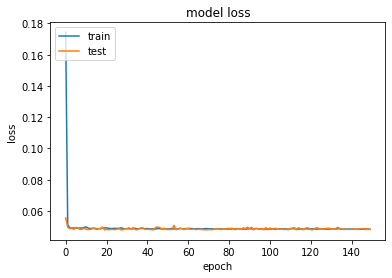

In [34]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
testpred = model.predict(xtest) # validate model on test data 
testpred = scaler.inverse_transform(testpred) # denormalized the data
testpred # show the test prediction result

array([[  18.778934,   53.601868, 1012.5408  ,   73.417885,  454.28574 ],
       [  19.024998,   53.754227, 1012.34216 ,   72.87467 ,  453.8499  ],
       [  19.038015,   53.59161 , 1012.1509  ,   72.4501  ,  453.6806  ],
       ...,
       [  18.891443,   53.630363, 1012.3956  ,   73.04527 ,  454.01852 ],
       [  19.364384,   54.01406 , 1012.0667  ,   72.163864,  453.23416 ],
       [  19.063692,   53.702618, 1012.22797 ,   72.644714,  453.74335 ]],
      dtype=float32)

In [36]:
xtest[0] # for one row 

array([[0.67989997],
       [0.37668021],
       [0.73991872],
       [0.38168178],
       [0.69044144],
       [0.52790952],
       [0.85789858],
       [0.60616563],
       [0.4708589 ],
       [0.60940695],
       [0.17868098],
       [0.50792434],
       [0.71950509],
       [0.61062591],
       [0.8294032 ],
       [0.85007278],
       [0.30240844],
       [0.53370386],
       [0.13324783],
       [0.41955252]])

In [37]:
test_one_row = np.expand_dims(xtest[0], axis=0) #  add dummy dimension

In [38]:
testpred_row = model.predict(test_one_row) # test with one row 
testpred_row = scaler.inverse_transform(testpred_row) # denormalized the prediction
testpred_row # show the result

array([[  18.778934,   53.60187 , 1012.5408  ,   73.417885,  454.28574 ]],
      dtype=float32)